In [1]:
import pandas as pd
import numpy as np
from AnalisisDatos_Cuencas import AnalisisDatos_Cuencas as AnalisisDatos
from Modelo_Cuencas import Modelo_Cuencas as Modelo
from RedesNeuronales_Cuencas import RedesNeuronales_Cuencas as RedesNeuronales
from Grafico_Cuencas import Grafico_Cuencas as Grafico

In [2]:
data = pd.read_excel("basemodelo.xlsx")
data["datetime"] = pd.to_datetime(data["datetime"])
data.to_csv("basemodelo.csv")

In [3]:
data

,datetime,temperatura,caudal,precipitacion,viento,nino,humedad
0,1984-11-15,26.434470,313.833333,-4995.314599,0.190004,25.52,0.016577
1,1984-11-16,25.258352,95.025806,-4997.387685,-2.674190,25.25,0.016784
2,1984-11-17,25.783527,34.236667,-4996.459944,-1.719997,26.64,0.017080
3,1984-11-18,26.544776,125.758065,-4993.809159,-0.009675,26.90,0.017490
4,1984-11-19,25.671400,412.838710,-4991.366396,0.461292,26.23,0.017077
5,1984-11-20,25.846354,326.433333,-4994.744150,-0.406664,26.33,0.016977
6,1984-11-21,24.391955,124.432258,-4997.273819,-1.748383,26.19,0.017123
7,1984-11-22,24.287491,40.476667,-4996.700145,-1.956664,27.49,0.017540
8,1984-11-23,25.533002,191.635484,-4992.503565,0.074197,27.40,0.018058
9,1984-11-24,26.095675,539.290323,-4992.415282,-0.187093,27.53,0.017461


## ANÁLISIS INICIAL DE LOS DATOS

In [5]:
analisis = AnalisisDatos('basemodelo.csv')

# Mostrar información básica
print(f"\nFilas: {analisis.filas}, Columnas: {analisis.columnas}")
print("\nPrimeras filas:")
print(analisis.datos.head())


Filas: 39, Columnas: 8

Primeras filas:
   Unnamed: 0    datetime  temperatura      caudal  precipitacion    viento  \
0           0  1984-11-15    26.434470  313.833333   -4995.314599  0.190004   
1           1  1984-11-16    25.258352   95.025806   -4997.387685 -2.674190   
2           2  1984-11-17    25.783527   34.236667   -4996.459944 -1.719997   
3           3  1984-11-18    26.544776  125.758065   -4993.809159 -0.009675   
4           4  1984-11-19    25.671400  412.838710   -4991.366396  0.461292   

    nino   humedad  
0  25.52  0.016577  
1  25.25  0.016784  
2  26.64  0.017080  
3  26.90  0.017490  
4  26.23  0.017077  


C:\Users\andre\OneDrive\Escritorio\Cuencas\Proyecto Individual\BaseDatos_Cuencas.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.__datos = pd.read_csv(self.__url).fillna(method = "bfill")


In [6]:
# Detectar valores nulos
print("\nValores nulos:")
nulos = analisis.nulos()
if nulos:
    for col, info in nulos.items():
        print(f"{col}: {info['Cantidad']} valores nulos")
else:
    print("No hay valores nulos")


Valores nulos:
No hay valores nulos


In [7]:
# Estadísticas básicas
print("\nEstadísticas básicas:")
stats = analisis.est_basicas()
for col, valores in stats.items():
    print(f"\n{col}:")
    print(f"  Mínimo: {valores['min']:.2f}")
    print(f"  Q1: {valores['q1']:.2f}")
    print(f"  Mediana: {valores['q2']:.2f}")
    print(f"  Q3: {valores['q3']:.2f}")
    print(f"  Máximo: {valores['max']:.2f}")



Estadísticas básicas:

Unnamed: 0:
  Mínimo: 0.00
  Q1: 9.50
  Mediana: 19.00
  Q3: 28.50
  Máximo: 38.00

temperatura:
  Mínimo: 24.21
  Q1: 25.02
  Mediana: 25.66
  Q3: 25.96
  Máximo: 27.64

caudal:
  Mínimo: 32.70
  Q1: 88.56
  Mediana: 138.42
  Q3: 283.84
  Máximo: 769.29

precipitacion:
  Mínimo: -4998.58
  Q1: -4996.46
  Mediana: -4994.14
  Q3: -4992.09
  Máximo: -4986.56

viento:
  Mínimo: -2.67
  Q1: -1.73
  Mediana: -0.80
  Q3: -0.05
  Máximo: 0.74

nino:
  Mínimo: 24.63
  Q1: 26.38
  Mediana: 26.93
  Q3: 27.74
  Máximo: 28.56

humedad:
  Mínimo: 0.02
  Q1: 0.02
  Mediana: 0.02
  Q3: 0.02
  Máximo: 0.02


In [8]:
# Detectar outliers
print("\nOutliers detectados:")
outliers = analisis.detectar_outliers()
if outliers:
    for col, info in outliers.items():
        print(f"{col}: {info['Cantidad']} outliers")
else:
    print("No se detectaron outliers significativos")


Outliers detectados:
Unnamed: 0: 5 outliers
temperatura: 1 outliers
caudal: 11 outliers
precipitacion: 4 outliers
viento: 2 outliers
nino: 15 outliers
humedad: 6 outliers


## VISUALIZACIÓN DE DATOS


Generando boxplot...


C:\Users\andre\OneDrive\Escritorio\Cuencas\Proyecto Individual\BaseDatos_Cuencas.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.__datos = pd.read_csv(self.__url).fillna(method = "bfill")


'Gráfico guardado como boxplot.png'

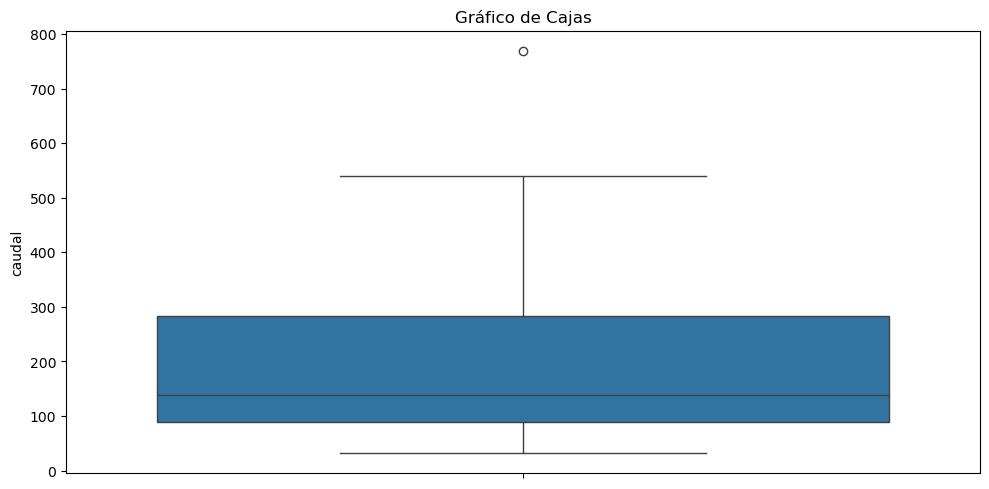

In [10]:
graficos = Grafico('basemodelo.csv')

# Boxplot
print("\nGenerando boxplot...")
fig_box = graficos.boxplot("caudal")
graficos.guardar_en_png('boxplot')



Generando gráfico de líneas...


'Gráfico guardado como lineas.png'

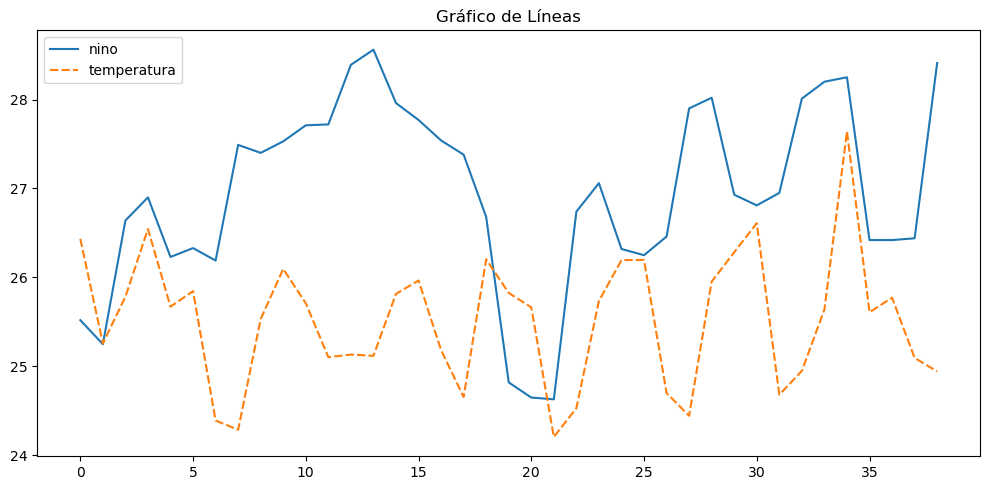

In [11]:
# Gráfico de líneas
print("\nGenerando gráfico de líneas...")
fig_line = graficos.linea(['nino', 'temperatura'])
graficos.guardar_en_png('lineas')


Generando distribución de humedad...


'Gráfico guardado como dist_humedad.png'

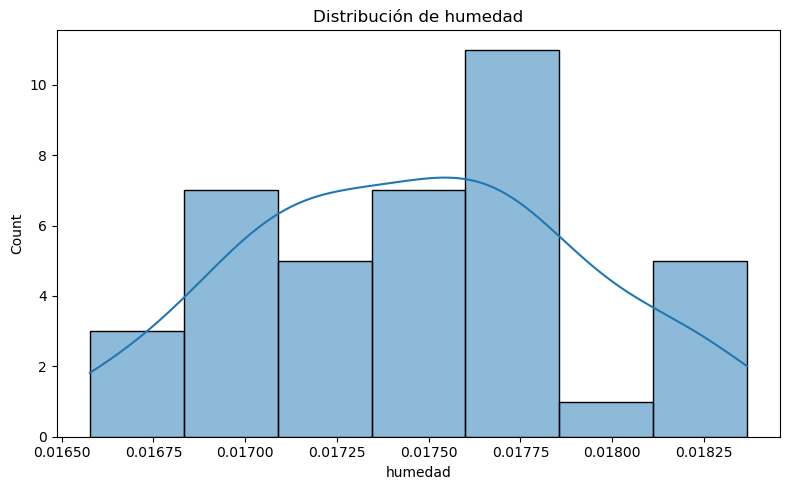

In [12]:
# Distribución de ventas
print("\nGenerando distribución de humedad...")
fig_dist = graficos.dist('humedad')
graficos.guardar_en_png('dist_humedad')



Generando heatmap de correlaciones...


'Gráfico guardado como heatmap.png'

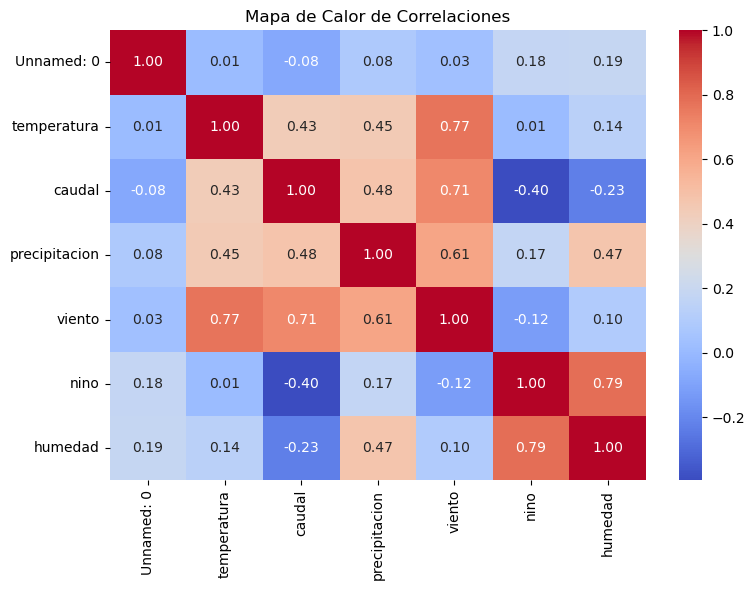

In [13]:
# Heatmap de correlaciones
print("\nGenerando heatmap de correlaciones...")
fig_heat = graficos.heatmap()
graficos.guardar_en_png('heatmap')

## MODELADO Y ANÁLISIS DE CORRELACIONES

In [15]:
modelo = Modelo('basemodelo.csv')

# Top correlaciones
print("\nTop correlaciones (percentil 90):")
modelo.top_corr(90)


Top correlaciones (percentil 90):
Correlaciones >= 0.71 (percentil 90):
nino vs humedad -> 0.79
temperatura vs viento -> 0.77
caudal vs viento -> 0.71


C:\Users\andre\OneDrive\Escritorio\Cuencas\Proyecto Individual\BaseDatos_Cuencas.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.__datos = pd.read_csv(self.__url).fillna(method = "bfill")


In [16]:
# Crear lags para ventas (datos temporales)
print("\nCreando variables rezagadas...")
for lag in [1,2,3,4,5,6]:  # 1 día, 1 semana, 1 mes
    modelo.lag(lag, 'caudal')
    modelo.lag(lag, 'nino')
    modelo.lag(lag, 'temperatura')
    modelo.lag(lag, 'precipitacion')

modelo.lag(12, "caudal")





Creando variables rezagadas...


,Unnamed: 0,datetime,temperatura,caudal,precipitacion,viento,nino,humedad,caudal_lag_1,nino_lag_1,...,precipitacion_lag_4,caudal_lag_5,nino_lag_5,temperatura_lag_5,precipitacion_lag_5,caudal_lag_6,nino_lag_6,temperatura_lag_6,precipitacion_lag_6,caudal_lag_12
0,0,1984-11-15,26.434470,313.833333,-4995.314599,0.190004,25.52,0.016577,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1984-11-16,25.258352,95.025806,-4997.387685,-2.674190,25.25,0.016784,313.833333,25.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1984-11-17,25.783527,34.236667,-4996.459944,-1.719997,26.64,0.017080,95.025806,25.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1984-11-18,26.544776,125.758065,-4993.809159,-0.009675,26.90,0.017490,34.236667,26.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1984-11-19,25.671400,412.838710,-4991.366396,0.461292,26.23,0.017077,125.758065,26.90,...,-4995.314599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1984-11-20,25.846354,326.433333,-4994.744150,-0.406664,26.33,0.016977,412.838710,26.23,...,-4997.387685,313.833333,25.52,26.434470,-4995.314599,NaN,NaN,NaN,NaN,NaN
6,6,1984-11-21,24.391955,124.432258,-4997.273819,-1.748383,26.19,0.017123,326.433333,26.33,...,-4996.459944,95.025806,25.25,25.258352,-4997.387685,313.833333,25.52,26.434470,-4995.314599,NaN
7,7,1984-11-22,24.287491,40.476667,-4996.700145,-1.956664,27.49,0.017540,124.432258,26.19,...,-4993.809159,34.236667,26.64,25.783527,-4996.459944,95.025806,25.25,25.258352,-4997.387685,NaN
8,8,1984-11-23,25.533002,191.635484,-4992.503565,0.074197,27.40,0.018058,40.476667,27.49,...,-4991.366396,125.758065,26.90,26.544776,-4993.809159,34.236667,26.64,25.783527,-4996.459944,NaN
9,9,1984-11-24,26.095675,539.290323,-4992.415282,-0.187093,27.53,0.017461,191.635484,27.40,...,-4994.744150,412.838710,26.23,25.671400,-4991.366396,125.758065,26.90,26.544776,-4993.809159,NaN


In [17]:
modelo.datos["datetime"]

0     1984-11-15
1     1984-11-16
2     1984-11-17
3     1984-11-18
4     1984-11-19
5     1984-11-20
6     1984-11-21
7     1984-11-22
8     1984-11-23
9     1984-11-24
10    1984-11-25
11    1984-11-26
12    1984-11-27
13    1984-11-28
14    1984-11-29
15    1984-11-30
16    1984-12-01
17    1984-12-02
18    1984-12-03
19    1984-12-04
20    1984-12-05
21    1984-12-06
22    1984-12-07
23    1984-12-08
24    1984-12-09
25    1984-12-10
26    1984-12-11
27    1984-12-12
28    1984-12-13
29    1984-12-14
30    1984-12-15
31    1984-12-16
32    1984-12-17
33    1984-12-18
34    1984-12-19
35    1984-12-20
36    1984-12-21
37    1984-12-22
38    1984-12-23
Name: datetime, dtype: object

In [18]:
modelo.datos.to_csv("datos_modelo.csv")

## MODELOS DE REDES NEURONALES

C:\Users\andre\OneDrive\Escritorio\Cuencas\Proyecto Individual\BaseDatos_Cuencas.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.__datos = pd.read_csv(self.__url).fillna(method = "bfill")
C:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Entrenando el modelo...
Entrenando el modelo...
Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0484 - val_loss: 0.0695
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0482 - val_loss: 0.0058
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0372 - val_loss: 0.0048
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0225 - val_loss: 0.0195
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0195 - val_loss: 0.0207
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0203 - val_loss: 0.0085
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0124 - val_loss: 0.0059
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0138 - val_loss: 0.0055
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0150 - val_loss: 0.0035
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0095 - val_loss: 0.0057
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0094 - val_loss: 0.0071
Epoch 12/500
1/1 

R²: 0.8779
RMSE: 54.2243
MAE: 43.3168
MSE: 2940.2703

Generando gráfico comparativo...

Guardando el modelo...
Modelo guardado como modelo_caudal_rna.h5


C:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: only integer scalar arrays can be converted to a scalar index

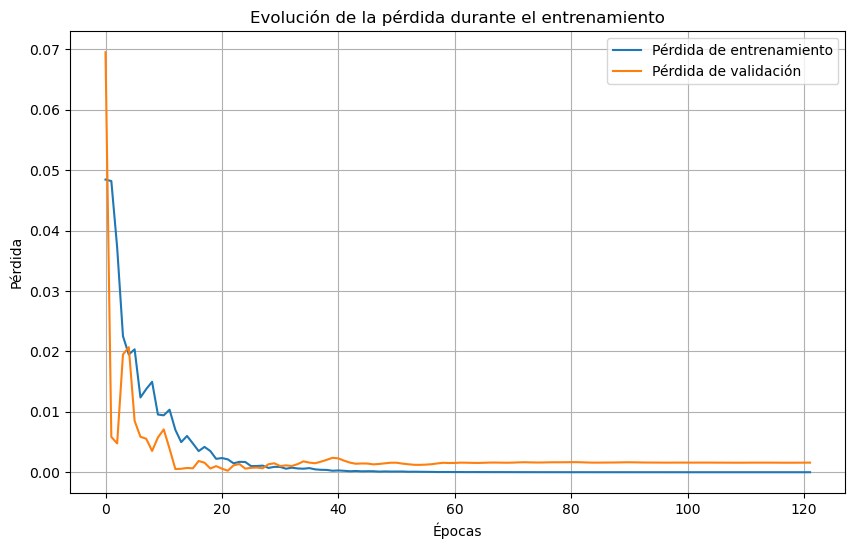

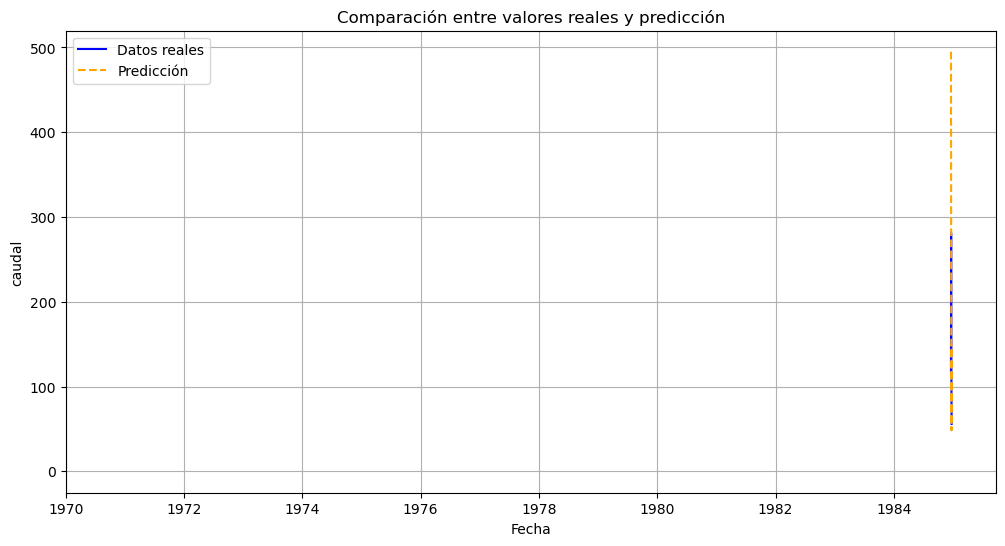

In [20]:
# Importar las clases necesarias
from RedesNeuronales_Cuencas import RedesNeuronales_Cuencas as RedesNeuronales
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Crear una instancia de RedNeuronal con nuestro archivo de datos
modelo_rn = RedesNeuronales('datos_modelo.csv')

# 3. Definir las variables predictoras y la variable objetivo

variables_x = [
    "temperatura", "precipitacion", "viento", "nino",
    "caudal_lag_1", "caudal_lag_2", "caudal_lag_3", "caudal_lag_4", "caudal_lag_5", "caudal_lag_6",
    "temperatura_lag_1", "temperatura_lag_2", "temperatura_lag_3", "temperatura_lag_4", "temperatura_lag_5", "temperatura_lag_6",
    "precipitacion_lag_1", "precipitacion_lag_2", "precipitacion_lag_3", "precipitacion_lag_4", "precipitacion_lag_5", "precipitacion_lag_6", 
    "nino_lag_1", "nino_lag_2", "nino_lag_3", "nino_lag_4", "nino_lag_5", "nino_lag_6","caudal_lag_12"
]
variable_y = "caudal"

# 4. Preprocesar los datos (escalado)
x_train, y_train, x_test, y_test, x_val, y_val = modelo_rn.preprocesar_datos(variables_x, variable_y)

# 5. Crear la arquitectura de la red neuronal (con callbacks para mejor entrenamiento)

arquitectura = [
    (44, 'relu'),  # Primera capa oculta: 44 neuronas, activación ReLU
    (22, 'relu'),  # Segunda capa oculta: 22 neuronas, activación ReLU
    (11, 'relu'),  # Tercera capa oculta: 11 neuronas, activación ReLU
    (1, None)      # Capa de salida: 1 neurona, sin activación (regresión)
]

modelo = modelo_rn.crear_modelo(
    capas=arquitectura,
    learning_rate=0.01,
    funcion_perdida='mean_squared_error'
)


# 7. Entrenar el modelo
print("\nEntrenando el modelo...")
historial = modelo_rn.entrenar(
    patience = 100,
    epochs=500,
    verbose=1)

# 8. Visualizar la evolución del entrenamiento
print("\nGenerando gráfico de pérdidas durante el entrenamiento...")
fig_perdidas = modelo_rn.graficar_perdidas()
modelo_rn.guardar_en_png("evolucion_entrenamiento")

# 9. Realizar predicciones
print("\nRealizando predicciones...")
predicciones = modelo_rn.predecir()
print(f"Forma de las predicciones: {predicciones.shape}")

# 10. Evaluar el rendimiento del modelo
print("\nEvaluando el rendimiento del modelo:")
metricas = modelo_rn.evaluar_modelo()

# 11. Visualizar resultados de predicción vs valores reales
print("\nGenerando gráfico comparativo...")
fig_resultados = modelo_rn.graficar_resultados("datetime", variable_y)
modelo_rn.guardar_en_png("comparacion_predicciones")

# 12. Guardar el modelo entrenado
print("\nGuardando el modelo...")
modelo_rn.guardar_modelo("modelo_caudal_rna")

#RELEVANCIA

#modelo_rn.shap()

modelo_rn.permutacion()

modelo_rn.gradientes()


In [21]:
pip install shap

In [ ]:
#RL

# Importar las clases necesarias
from RegresionLineal import RegresionLineal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Crear una instancia de RegresionLineal y cargar los datos
print("Cargando datos...")
ruta_datos = 'datos_modelo.csv'
modelo_rl = RegresionLineal(ruta_datos)

# 2. Explorar los datos
print("\nEstructura de los datos:")
print(f"Dimensiones: {modelo_rl.tamano}")
print("\nPrimeras filas:")
print(modelo_rl.datos.head())

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
print("\nDividiendo datos...")
X_train, X_test, y_train, y_test = modelo_rl.dividir_datos(
    variable_y="caudal",
    excluir_cols=["datetime"],
    test_size=0.2,
    random_state=42
)

# 4. Escalar los datos
print("\nEscalando datos...")
X_train_scaled, X_test_scaled = modelo_rl.escalar_datos()

# 5. Entrenar modelo con sklearn
print("\nEntrenando modelo con sklearn...")
modelo_sklearn = modelo_rl.entrenar_sklearn()

# 6. Hacer predicciones con sklearn
print("\nHaciendo predicciones con sklearn...")
predicciones_sklearn = modelo_rl.predecir()

# 7. Evaluar el modelo de sklearn
print("\nEvaluando modelo de sklearn:")
metricas_sklearn = modelo_rl.evaluar_modelo()

# 8. Graficar resultado de predicciones vs valores reales
print("\nGenerando gráfico de predicciones...")
fig_predicciones = modelo_rl.graficar_predicciones("datetime")
modelo_rl.guardar_en_png("predicciones_regresion_lineal")

# 9. Graficar dispersión de predicciones
print("\nGenerando gráfico de dispersión...")
fig_dispersion = modelo_rl.graficar_dispersion()
modelo_rl.guardar_en_png("dispersion_regresion_lineal")

# 10. Entrenar modelo con statsmodels para análisis más detallado
print("\nEntrenando modelo con statsmodels...")
modelo_statsmodels = modelo_rl.entrenar_statsmodels()

# 11. Mostrar resumen completo del modelo statsmodels
print("\nResumen del modelo statsmodels:")
resumen = modelo_rl.mostrar_resumen()
print(resumen)

# 12. Graficar coeficientes del modelo
print("\nGenerando gráfico de coeficientes...")
fig_coeficientes = modelo_rl.graficar_coeficientes(top_n=10)
modelo_rl.guardar_en_png("coeficientes_regresion_lineal")

# 13. Identificar variables significativas
print("\nIdentificando variables significativas (p-valor < 0.05):")
significativas = modelo_rl.variables_significativas()
print(significativas)

# 14. Generar predicciones con el modelo statsmodels
print("\nHaciendo predicciones con statsmodels...")
predicciones_statsmodels = modelo_rl.predecir(usar_statsmodels=True)

# 15. Evaluar modelo statsmodels
print("\nEvaluando modelo statsmodels:")
metricas_statsmodels = modelo_rl.evaluar_modelo()

# 16. Resumen final
print("\n" + "="*50)
print("RESUMEN FINAL DE REGRESIÓN LINEAL")
print("="*50)
print(f"Número de observaciones: {len(modelo_rl.datos)}")
print(f"Número de predictores: {len(X_train.columns)}")
print("\nMétricas de rendimiento:")
for metrica, valor in metricas_statsmodels.items():
    print(f"- {metrica}: {valor:.4f}")

# Solo mostrar las variables más significativas
top_5_significativas = significativas.head(5)
print("\nVariables más significativas:")
for idx, row in top_5_significativas.iterrows():
    print(f"- {row['Variable']}: coef = {row['Coeficiente']:.4f}, p-valor = {row['P-valor']:.4f}")

print("\nArchivos generados:")
print("- predicciones_regresion_lineal.png")
print("- dispersion_regresion_lineal.png")
print("- coeficientes_regresion_lineal.png")
print("="*50)

In [ ]:
#ARIMA

# Importar la clase ModeloARIMA
from ModeloARIMA import ModeloARIMA  # Asegúrate de que el nombre del archivo sea correcto

# Crear una instancia de la clase ModeloARIMA
url = 'datos_modelo.csv'  # Ruta al archivo de datos

modelo_arima = ModeloARIMA(url)

# 1. Visualizar los datos
modelo_arima.visualizar_datos()

# 2. Probar la estacionaridad de la serie 'caudal'
resultado_adf = modelo_arima.test_estacionaridad('caudal')

# 3. Si el p-value es mayor que 0.05, diferenciar la serie
if resultado_adf[1] > 0.05:
    serie_diferenciada = modelo_arima.diferenciar('caudal')

# 4. Ajustar el modelo ARIMA
modelo_arima.ajustar_modelo('caudal', order=(6, 1, 1))

# 5. Evaluar el modelo ajustado
# Suponiendo que 'caudal' es la serie original
modelo_arima.evaluar_modelo(modelo_arima.data['caudal'])

# 6. Realizar pronósticos para los próximos 12 meses
modelo_arima.pronosticar(steps=12)

In [ ]:
#RANDOM FOREST

# Importar la clase ModeloRandomForest
from ModeloRandomForest import ModeloRandomForest  # Asegúrate de que el nombre del archivo sea correcto

# Crear una instancia de la clase ModeloRandomForest
url = "datos_modelo.csv"  # Ruta al archivo de datos
target_column = "caudal"  # Nombre de la columna objetivo
col_ignore = "datetime"
modelo_rf = ModeloRandomForest(url, target_column,col_ignore)

# 1. Preparar los datos
modelo_rf.preparar_datos()

# 2. Ajustar el modelo Random Forest
modelo_rf.ajustar_modelo()

# 3. Evaluar el modelo ajustado
modelo_rf.evaluar_modelo()

# 4. Visualizar los resultados de las predicciones
modelo_rf.visualizar_resultados()